<a href="https://colab.research.google.com/github/premkumarthimmagalla/AQI-App/blob/main/st20313528.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from datetime import datetime

import calendar

In [3]:
import time
start_time = time.time()


In [16]:

data = "/content/drive/MyDrive/PRSA_Data"



In [17]:
# Read and concatenate all CSV files in the directory into a single DataFrame
all_files = glob(os.path.join(data, '*.csv'))
df_list = [pd.read_csv(file) for file in all_files]


In [18]:
df = pd.concat(df_list, ignore_index=True)

In [19]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,wd,WSPM,station,Date,Open,High,Low,Close,Adj Close,Volume
0,1.0,2013.0,3.0,1.0,0.0,4.0,4.0,4.0,7.0,300.0,...,NNW,4.4,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2013.0,3.0,1.0,1.0,8.0,8.0,4.0,7.0,300.0,...,N,4.7,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2013.0,3.0,1.0,2.0,7.0,7.0,5.0,10.0,300.0,...,NNW,5.6,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2013.0,3.0,1.0,3.0,6.0,6.0,11.0,11.0,300.0,...,NW,3.1,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2013.0,3.0,1.0,4.0,3.0,3.0,12.0,12.0,300.0,...,N,2.0,Aotizhongxin,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421774 entries, 0 to 421773
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   No         420768 non-null  float64
 1   year       420768 non-null  float64
 2   month      420768 non-null  float64
 3   day        420768 non-null  float64
 4   hour       420768 non-null  float64
 5   PM2.5      412029 non-null  float64
 6   PM10       414319 non-null  float64
 7   SO2        411747 non-null  float64
 8   NO2        408652 non-null  float64
 9   CO         400067 non-null  float64
 10  O3         407491 non-null  float64
 11  TEMP       420370 non-null  float64
 12  PRES       420375 non-null  float64
 13  DEWP       420365 non-null  float64
 14  RAIN       420378 non-null  float64
 15  wd         418946 non-null  object 
 16  WSPM       420450 non-null  float64
 17  station    420768 non-null  object 
 18  Date       1006 non-null    object 
 19  Open       1006 non-nul

In [21]:
# Check for missing values
missing_values = df.isnull().sum()
print('\nMissing Values in Each Column:')
print(missing_values)
df.drop('No', axis = 1, inplace = True)


Missing Values in Each Column:
No             1006
year           1006
month          1006
day            1006
hour           1006
PM2.5          9745
PM10           7455
SO2           10027
NO2           13122
CO            21707
O3            14283
TEMP           1404
PRES           1399
DEWP           1409
RAIN           1396
wd             2828
WSPM           1324
station        1006
Date         420768
Open         420768
High         420768
Low          420768
Close        420768
Adj Close    420768
Volume       420768
dtype: int64


In [22]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,PRES,DEWP,RAIN,WSPM,Open,High,Low,Close,Adj Close,Volume
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,...,420375.000000,420365.000000,420378.000000,420450.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,...,1010.746982,2.490822,0.064476,1.729711,131.680586,133.353111,130.204304,131.870169,130.628480,2.657776e+07
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,...,10.474055,13.793847,0.821004,1.246386,104.420170,105.659186,103.491795,104.711618,103.802969,1.609903e+07
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,...,982.400000,-43.400000,0.000000,0.000000,22.110001,23.490000,20.000000,22.000000,22.000000,4.290500e+06
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,...,1002.300000,-8.900000,0.000000,0.900000,33.062501,33.704999,32.475001,33.062501,33.062501,1.600338e+07
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,...,1010.400000,3.100000,0.000000,1.400000,95.359999,96.310001,93.305001,94.420002,93.013126,2.271815e+07
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,...,1019.000000,15.100000,0.000000,2.200000,215.882496,218.562503,212.917499,215.367504,211.111572,3.244212e+07
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,...,1042.800000,29.100000,72.500000,13.200000,365.000000,372.380005,362.269989,366.529999,366.529999,1.227528e+08


In [25]:
# Function to assign AQI category based on pollutant levels
def assign_aqi_category(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    max_value = row[pollutants].max()

    if max_value <= 50:
        return 'Excellent'
    elif max_value <= 100:
        return 'Good'
    elif max_value <= 150:
        return 'Slightly Polluted'
    elif max_value <= 200:
        return 'Lightly Polluted'
    elif max_value <= 250:
        return 'Moderately Polluted'
    elif max_value <= 300:
        return 'Heavily Polluted'
    else:
        return 'Severely Polluted'

In [26]:
# prompt: min amd max value of each variable.

# Calculate min and max values for each variable
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
    min_val = df[column].min()
    max_val = df[column].max()
    print(f"Variable: {column}")
    print(f"Min Value: {min_val}")
    print(f"Max Value: {max_val}")
    print("-" * 20)

Variable: year
Min Value: 2013.0
Max Value: 2017.0
--------------------
Variable: month
Min Value: 1.0
Max Value: 12.0
--------------------
Variable: day
Min Value: 1.0
Max Value: 31.0
--------------------
Variable: hour
Min Value: 0.0
Max Value: 23.0
--------------------
Variable: PM2.5
Min Value: 2.0
Max Value: 999.0
--------------------
Variable: PM10
Min Value: 2.0
Max Value: 999.0
--------------------
Variable: SO2
Min Value: 0.2856
Max Value: 500.0
--------------------
Variable: NO2
Min Value: 1.0265
Max Value: 290.0
--------------------
Variable: CO
Min Value: 100.0
Max Value: 10000.0
--------------------
Variable: O3
Min Value: 0.2142
Max Value: 1071.0
--------------------
Variable: TEMP
Min Value: -19.9
Max Value: 41.6
--------------------
Variable: PRES
Min Value: 982.4
Max Value: 1042.8
--------------------
Variable: DEWP
Min Value: -43.4
Max Value: 29.1
--------------------
Variable: RAIN
Min Value: 0.0
Max Value: 72.5
--------------------
Variable: WSPM
Min Value: 0.0
Max 

In [27]:
# Apply the AQI category function to the DataFrame
df['AQI'] = df.apply(assign_aqi_category, axis=1)

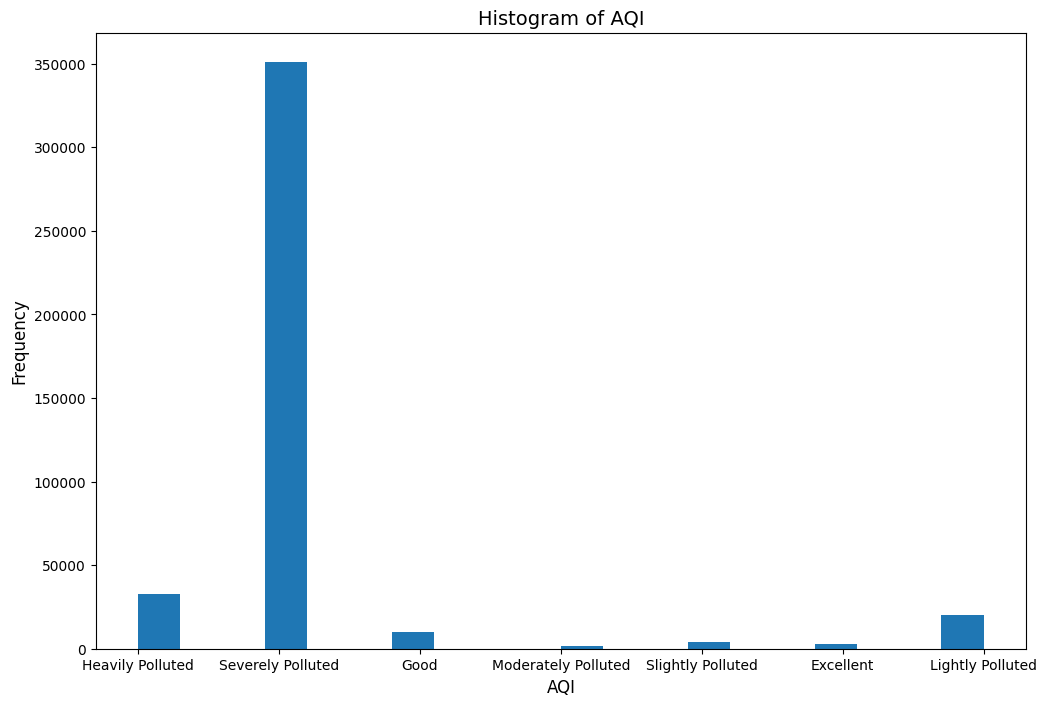

In [28]:
# Histogram
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
plt.hist(df['AQI'], bins=20)
plt.xlabel('AQI', fontsize=12)  # Increase font size of labels
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of AQI', fontsize=14)  # Increase font size of title
plt.xticks(fontsize=10)  # Increase font size of x-axis ticks
plt.yticks(fontsize=10)  # Increase font size of y-axis ticks
plt.show()

In [29]:
# Calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print('\nPercentage of Missing Values:')
print(missing_percentage.round(2))


Percentage of Missing Values:
No            0.24
year          0.24
month         0.24
day           0.24
hour          0.24
PM2.5         2.31
PM10          1.77
SO2           2.38
NO2           3.11
CO            5.15
O3            3.39
TEMP          0.33
PRES          0.33
DEWP          0.33
RAIN          0.33
wd            0.67
WSPM          0.31
station       0.24
Date         99.76
Open         99.76
High         99.76
Low          99.76
Close        99.76
Adj Close    99.76
Volume       99.76
dtype: float64


In [30]:
# Unique values in categorical columns
print('\nUnique Wind Directions:', df['wd'].unique())
print('Unique Stations:', df['station'].unique())
print('Unique AQI Categories:', df['AQI'].unique())



Unique Wind Directions: ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]
Unique Stations: ['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong' nan]
Unique AQI Categories: ['Heavily Polluted' 'Severely Polluted' 'Good' 'Moderately Polluted'
 'Slightly Polluted' 'Excellent' 'Lightly Polluted']


In [39]:
# Exclude non-numeric columns for analysis
columns_to_exclude = ['wd', 'station', 'AQI', 'Date']
df_numeric = df.drop(columns=columns_to_exclude)

In [40]:
# Calculate skewness
skewness = df_numeric.skew()
print('\nSkewness of Numeric Columns:')
print(skewness)



Skewness of Numeric Columns:
year          0.054847
month        -0.009294
day           0.006760
hour          0.000000
PM2.5         2.013975
PM10          1.885835
SO2           3.009503
NO2           1.050055
CO            2.570129
O3            1.660095
TEMP         -0.104267
PRES          0.106314
DEWP         -0.187736
RAIN         30.043633
WSPM          1.625590
Open          0.383813
High          0.387932
Low           0.382476
Close         0.387075
Adj Close     0.409919
Volume        2.041756
dtype: float64
